# Занятие 11. Проект построения модели машинного обучения для регрессии

### 1. Problem Definition, Loading the libraries and the dataset

In [58]:
# Load libraries
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')
%matplotlib inline

In [21]:
# Load dataset
filename = 'wine.csv'

dataset = pd.read_csv(filename)
dataset = dataset.fillna(method='ffill')

### 2. Analyze Data

#### Descriptive statistics

In [22]:
# shape
print(dataset.shape)

(6497, 13)


In [23]:
# types
dataset.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [24]:
dataset.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.04,45.0,170.0,1.00,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.05,14.0,132.0,0.99,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,1.00,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,1.00,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.04,30.0,136.0,0.99,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.04,45.0,170.0,1.00,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.05,14.0,132.0,0.99,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.04,28.0,129.0,0.99,3.22,0.45,11.0,6


In [25]:
# descriptions
set_option('precision', 1)
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.0,6.5e+03,6497.0,6497.0,6.5e+03,6497.0,6497.0,6.5e+03,6497.0,6497.0,6497.0,6497.0
mean,7.2,3.4e-01,0.3,5.4,5.6e-02,30.5,115.7,9.9e-01,3.2,0.5,10.5,5.8
std,1.3,1.6e-01,0.1,4.8,3.5e-02,17.7,56.5,3.0e-03,0.2,0.1,1.2,0.9
min,3.8,8.0e-02,0.0,0.6,9.0e-03,1.0,6.0,9.9e-01,2.7,0.2,8.0,3.0
25%,6.4,2.3e-01,0.2,1.8,3.8e-02,17.0,77.0,9.9e-01,3.1,0.4,9.5,5.0
50%,7.0,2.9e-01,0.3,3.0,4.7e-02,29.0,118.0,9.9e-01,3.2,0.5,10.3,6.0
75%,7.7,4.0e-01,0.4,8.1,6.5e-02,41.0,156.0,1.0e+00,3.3,0.6,11.3,6.0
max,15.9,1.6e+00,1.7,65.8,6.1e-01,289.0,440.0,1.0e+00,4.0,2.0,14.9,9.0


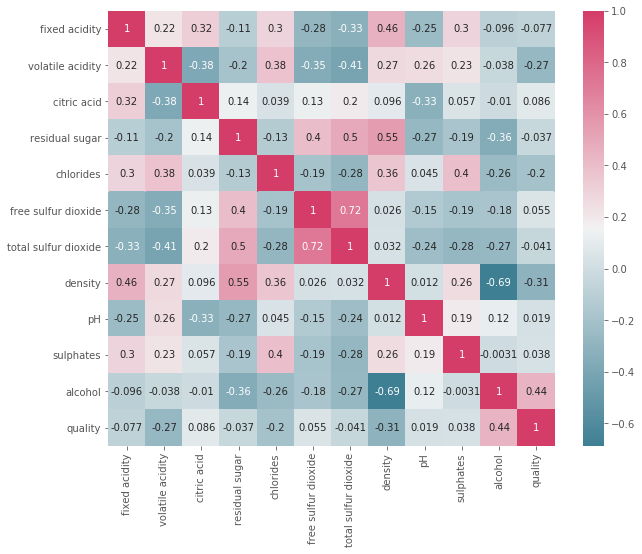

In [59]:
fig = plt.figure(figsize=(10,8))
cmap = sns.diverging_palette(220, 0, as_cmap=True)
sns.heatmap(dataset.corr(), cmap=cmap, annot = True)

b1,t1=plt.ylim()
b1+=0.5
t1-=0.5
plt.ylim(b1, t1)
plt.show()

#### Data Visualizations

##### Unimodal Data Visualizations

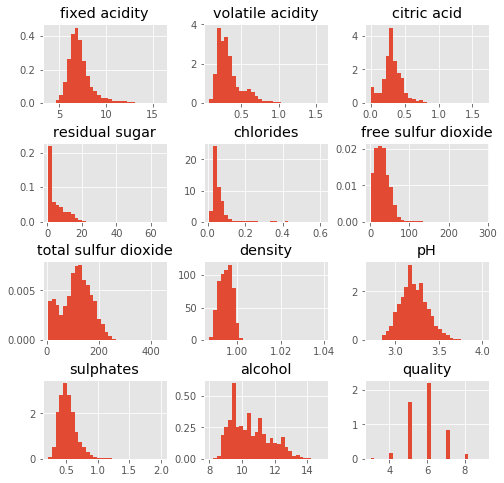

In [61]:
dataset.hist(figsize=(8,8), density=True, layout=(4,3), bins=30, sharex=False, sharey=False)
plt.subplots_adjust(hspace=0.5)
plt.show()

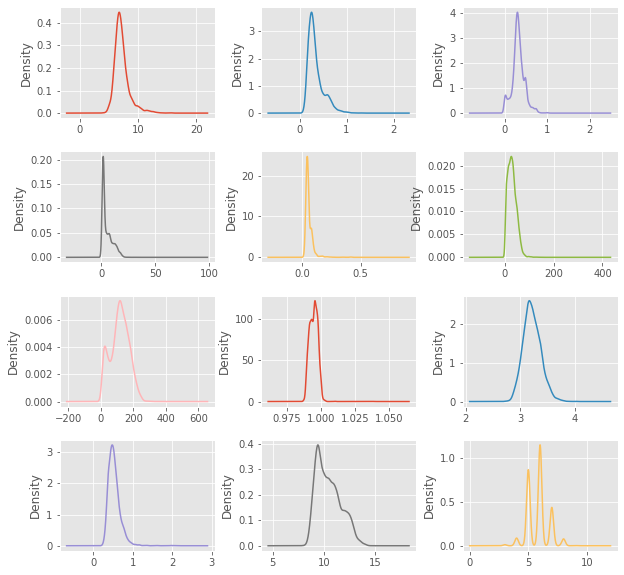

In [66]:
# density
dataset.plot(kind='density', figsize=(10,10), subplots=True, layout=(4,3), sharex=False, legend=False)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

pyplot.show()

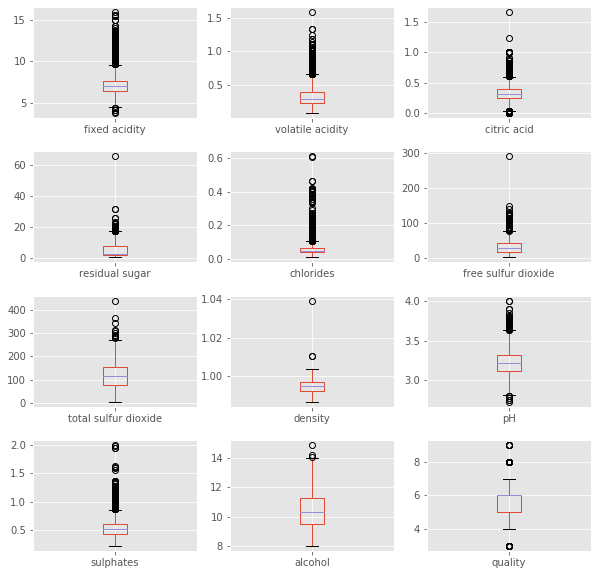

In [76]:
dataset.plot(kind='box',subplots=True, figsize=(10,10), layout=(4,3), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.show()

##### Multimodal Data Visualizations

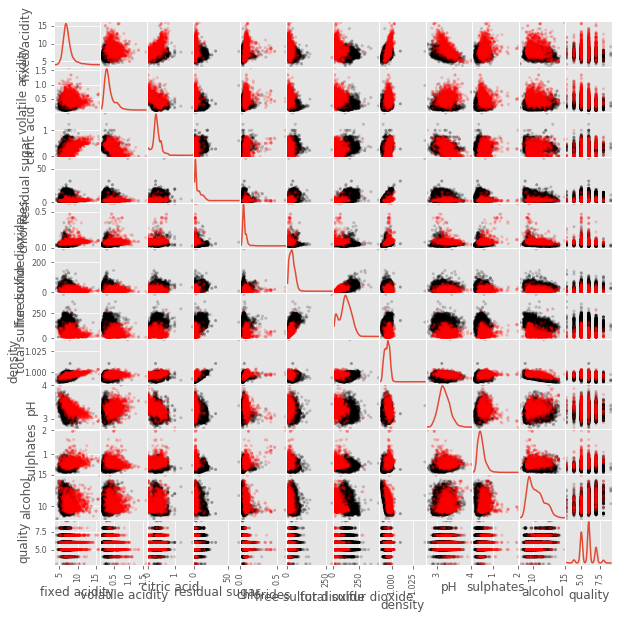

In [79]:
# scatter plot matrix
from pandas.plotting import scatter_matrix

colors = {'white': 'black'}
scatter_matrix(dataset, figsize=(10,10), diagonal='kde', c=dataset['type'].replace(colors), alpha=0.2)

plt.show()

### 3. Validation Dataset

In [84]:
# Split-out validation dataset
array = dataset.values
X = array[:,1:11]
Y = array[:,11]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### 4. Evaluate Algorithms: Baseline

In [85]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [87]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.308083 (0.125894)
LASSO: -1.280285 (0.053714)
EN: -1.241425 (0.049691)
KNN: -1.132461 (0.056483)
CART: -0.323317 (0.028145)
SVR: -1.044377 (0.049271)


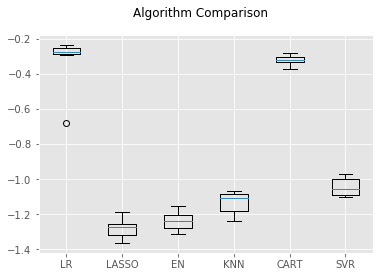

In [90]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 5. Evaluate Algorithms: Standardize Data

In [91]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.308083 (0.125894)
ScaledLASSO: -1.423485 (0.070740)
ScaledEN: -1.112880 (0.060924)
ScaledKNN: -0.344952 (0.026545)
ScaledCART: -0.328808 (0.025944)
ScaledSVR: -0.165991 (0.017890)


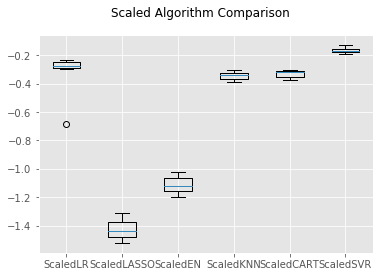

In [92]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 6. Algorithm Tuning

In [93]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.337372 using {'n_neighbors': 3}
-0.382556 (0.050652) with: {'n_neighbors': 1}
-0.337372 (0.028120) with: {'n_neighbors': 3}
-0.343469 (0.027834) with: {'n_neighbors': 5}
-0.347797 (0.029587) with: {'n_neighbors': 7}
-0.348810 (0.029877) with: {'n_neighbors': 9}
-0.349529 (0.028046) with: {'n_neighbors': 11}
-0.356636 (0.026926) with: {'n_neighbors': 13}
-0.361934 (0.026251) with: {'n_neighbors': 15}
-0.368603 (0.026509) with: {'n_neighbors': 17}
-0.376299 (0.028268) with: {'n_neighbors': 19}
-0.380896 (0.030304) with: {'n_neighbors': 21}


### 7. Ensemble Methods

In [94]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -0.461264 (0.023361)
ScaledGBM: -0.229283 (0.015493)
ScaledRF: -0.179191 (0.017883)
ScaledET: -0.171159 (0.018402)


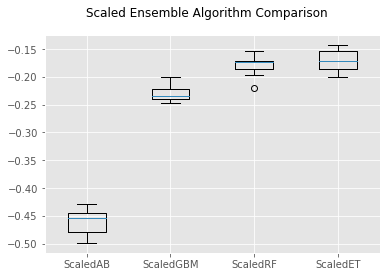

In [95]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [98]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([250,300,350,400, 450]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [99]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.157086 using {'n_estimators': 450}
-0.171964 (0.014374) with: {'n_estimators': 250}
-0.166356 (0.014678) with: {'n_estimators': 300}
-0.162268 (0.014691) with: {'n_estimators': 350}
-0.159282 (0.014707) with: {'n_estimators': 400}
-0.157086 (0.014718) with: {'n_estimators': 450}


### 8. Finalize Model

In [100]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=450)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=450,
                          n_iter_no_change=None, presort='auto', random_state=7,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [101]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

0.15735814516849844
